# Heart Disease Prediction
# SVM - optimizing our model and experimenting with different kernels

In [11]:
## installing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [12]:
import os
os.chdir('C:/Users/19726/Desktop/statquest_support_vector_machines_in_python_v3/SVM_python')

In [18]:
df=pd.read_csv('processed.cleveland.data',header=None)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### We just have column numbers, replacing the column numbers with the following column names:

#### age: age of patient
#### sex: sex of patient
#### cp: chest pain
#### restbp: resting blood pressure (in mm Hg)
#### chol: serum cholesterol in mg/dl
#### fbs: fasting blood sugar
#### restecg: resting electrocardiographic results
#### thalach: maximum heart rate achieved
#### exang: exercise induced angina
#### oldpeak: ST depression induced by exercise relative to rest
#### slope: the slope of the peak exercise ST segment.
#### ca: number of major vessels (0-3) colored by fluoroscopy
#### thal: this is short of thalium heart scan.
#### hd: diagnosis of heart disease, the predicted attribute

In [20]:
df.columns=['age','sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Checking datatypes

In [21]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [26]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [27]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

#### We see here that missing data is represented by the char '?' 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
hd         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


#### Removing rows with missing data

In [30]:
df_new=df.loc[(df.ca != '?') & (df.thal != '?')]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null float64
cp         297 non-null float64
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null float64
restecg    297 non-null float64
thalach    297 non-null float64
exang      297 non-null float64
oldpeak    297 non-null float64
slope      297 non-null float64
ca         297 non-null object
thal       297 non-null object
hd         297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [31]:
df_new.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [32]:
df_new.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [34]:
# Independent variables
X=df_new.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [37]:
# Dependent variable
y=df_new['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [42]:
df_new.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

#### One-Hot Encoding our Categorical Variables

In [43]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [44]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

##### Converting our target variable to binary to having heart disease or not having heart disease instead of different levels of heart disease.
##### 0 Represents not having heart disease and 1 represents having heart disease 

In [45]:
y[y>0]=1
y.unique()

array([0, 1], dtype=int64)

#### Splitting Data into Train and Test

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded,y,random_state=42)

#### Scaling our columns

In [47]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

#### Fitting our model

In [48]:
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Confusion Matrix

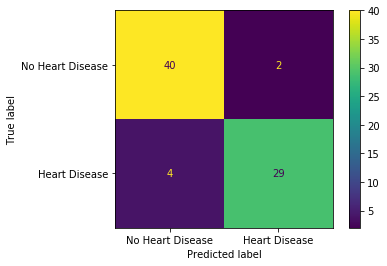

In [51]:
plot_confusion_matrix(svm_clf,X_test_scaled,y_test,display_labels=['No Heart Disease','Heart Disease'])

#### Grid Search CV for finding best parameters of RBF Kernel

In [53]:
num_features=np.size(X_train_scaled,axis=1)

In [54]:
param_grid = [
    {
        'C':[1,10,100,1000],
        'gamma':[1/num_features,1,0.1,0.01,0.001,0.0001],
        'kernel':['rbf']
    }
]

In [78]:
optimal_params = GridSearchCV(

    SVC(),
    param_grid,
    cv=5,
    scoring='roc_auc', ## setting roc_auc as our metric
    verbose=0
        
)

In [79]:
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


#### We have got optimal parameters, C = 10 and Gamma = 0.0001
#### We will use this to create a new SVM model

In [58]:
clf_svm2=SVC(random_state=42, C=10, gamma=0.0001)
clf_svm2.fit(X_train_scaled,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

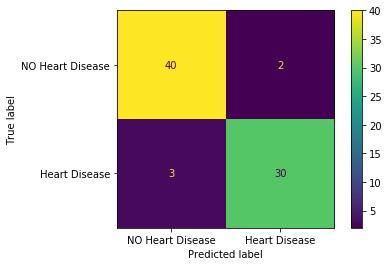

In [60]:
plot_confusion_matrix(clf_svm2,X_test_scaled,y_test,display_labels=['NO Heart Disease','Heart Disease'])

#### We see that there is very little difference in confusion matrix values

In [61]:
len(df.columns)

14

#### Applying PCA to use 2 transformed orthogonal columns to plot a SVM Descision Surface

#### Scree Plot - To see how much of variance is explained by each component

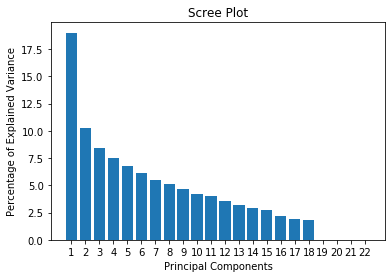

In [62]:
pca=PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=[str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height= per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

#### We will select first 2 components to create the Decision Boundary

In [63]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

In [84]:
pca_train_scaled

array([[ 0.00662321,  1.20084517],
       [-0.85411032, -1.55703364],
       [-1.04088236, -1.81569945],
       [-1.64246222, -0.84125456],
       [-1.46470157, -0.75727266],
       [ 0.20373193, -0.17945817],
       [ 0.78248086, -0.1918519 ],
       [ 1.1457197 , -0.30311402],
       [ 0.83133758, -1.89832051],
       [ 1.6421448 , -1.21664016],
       [-1.16373499, -0.52873949],
       [ 0.5328885 , -0.82168002],
       [ 1.30948862,  1.66824068],
       [-0.66289267, -1.44550289],
       [ 1.42870841,  0.10359894],
       [ 0.83512961, -0.34096318],
       [ 1.48090076,  0.66658763],
       [-0.52646105, -1.82658089],
       [-0.4711991 , -0.30854879],
       [-1.4111537 , -0.77481355],
       [ 0.59178873,  0.51875606],
       [-0.32972611,  0.06426031],
       [-1.34047712, -0.03888227],
       [-0.14657148, -0.15930203],
       [ 0.47495702, -1.566307  ],
       [ 0.28380656,  0.20835911],
       [-1.36792724,  0.59083009],
       [ 0.46864295, -0.04934512],
       [-0.20707167,

In [85]:
num_features=np.size(pca_train_scaled,axis=1)
num_features

2

#### Optimizing our 2 PCA SVM Model

In [80]:
optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.045454545454545456, 'kernel': 'rbf'}


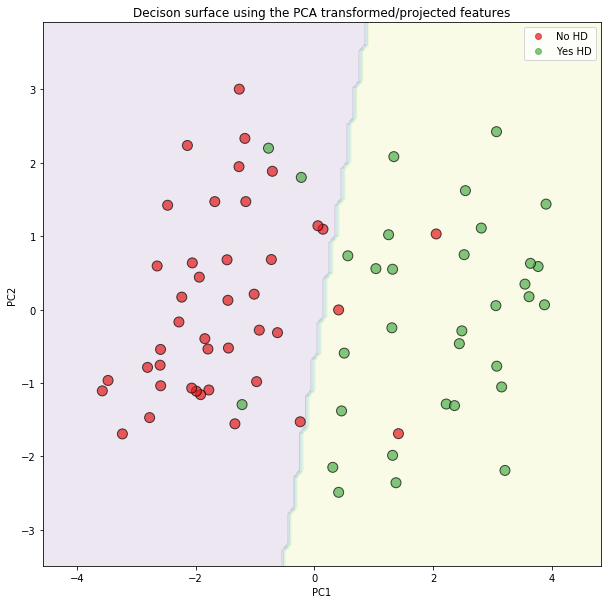

In [86]:
clf_svm = SVC(random_state=42, C=100, gamma=0.0001)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
## plt.savefig('svm.png')
plt.show()

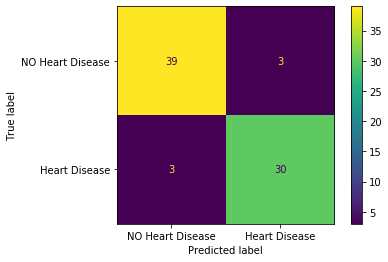

In [91]:
plot_confusion_matrix(clf_svm,X_test_pca[:,:2],y_test,display_labels=['NO Heart Disease','Heart Disease'])

#### We see that performance decreased when we used only 2 PCA components to fit the model, this happened because they could not explain more variance in the dataset. Here they were only used to create a Decision Surface